In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2-D distribution of follicles

## Supportive functions for the simulation

### Sketching follicles and ovary

In [2]:
# Function to sketch circular follicle given in dataframe df
def sketch_follicles(df):
    t = np.arange(0,1.01, 0.01) * np.pi * 2.0
    for ind in df.index:
        r = df['fol_size'][ind]
        x = df['x'][ind] + r  * np.cos(t)
        y = df['y'][ind] + r  * np.sin(t)
        plt.plot(x,y)
    
# Sketch circular ovary diameter r    
def sketch_ovary(r):
    t = np.arange(0,1.01, 0.01) * np.pi * 2.0
    x = r  * np.cos(t)
    y = r  * np.sin(t)
    plt.plot(x,y)

### Find indices of follicles outside the ovary

In [3]:
#Function which return indices for distances outside given radius r
def outside_of_ofary_ind(df, r):  
    ind = df.index[df['distance'] >= r -abs(df['fol_size']) ]
    return(ind.tolist())

###  FInd indices of overlapping folicles

Calculate distance matrix and a sum of radii matrix. If sum distance less than sum of radii, then the circles are overlap. Distance between centers C1 and C2 is calculated as C1C2 = sqrt((x1 - x2)2 + (y1 - y2)2).

If C1C2<r1+r2 -overlap

In [29]:
def overlap_indices_old(df):
    #n = len(df)
    indices = df.index
    #center_dist_matrix = np.zeros ((n, n))
    #sum_radii_matrix   = np.zeros ((n, n))
    overlap_indices = []
    for i in    indices:
        for j in  indices:
            center_dist = np.sqrt((df.x[i] - df.x[j])**2 + (df.y[i] - df.y[j])**2)
            sum_radii   = df.fol_size[i] + df.fol_size[j]
            if (i!=j) & (center_dist < sum_radii):
                overlap_indices.append(j)
    return(overlap_indices)  

In [28]:
def overlap_indices(df):
    #n = len(df)
    indices = df.index
    #center_dist_matrix = np.zeros ((n, n))
    #sum_radii_matrix   = np.zeros ((n, n))
    overlap_indices = []
    for i in    indices:
        for j in  indices:
            center_dist = np.sqrt((df.x[i] - df.x[j])**2 + (df.y[i] - df.y[j])**2)
            sum_radii   = df.fol_size[i] + df.fol_size[j]
            #if (i!=j) & (center_dist < sum_radii):
            if (i<j) & (center_dist < sum_radii):
                overlap_indices.append(j)
    return(overlap_indices) 

### Remove overlapping and outside of area follicles

In [5]:
def clean_up_selection(df, n_follicles):
    # Combine all indices needed to remove
    indices_to_remove = overlap_indices(df)+ outside_of_ofary_ind(df, ovary_r)
    # Make an index list for follicles to keep
    boolean_ind_keep = ~df.index.isin(indices_to_remove)
    # Make reduced dataframe with only indices for folices to keep
    df_reduced = df.loc[df.index[boolean_ind_keep]]
    # Keep only first 100 follicles
    ind = df_reduced.index
    if (len(ind) < n_follicles):
        print('Initial number of follicles is too small. Chose larger n')
    else:
        df_reduced = df_reduced.loc[ind[:n_follicles]]
    return(df_reduced)

## Simulate 2D ovary distribution in the ovary

50

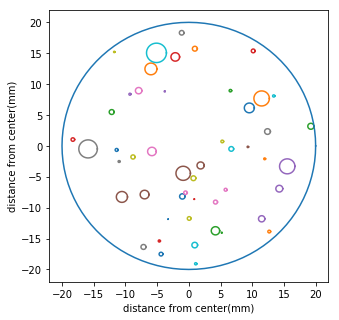

In [32]:
# Chose parameters for ovary size and slice thickness (in mm)
ovary_r = 20.
slice_thickness = 0.01
# Chose rate parameter for exponential distribution
shape_cont= 2
scale_cont = 0.2

# Choose number of follicle per ovary
n_final = 50
# Chose initial number of follicle selected, should be at least twice the number of n_final
n = 100
# Randomly choose position of the folicelse
x    = ovary_r*(2*np.random.random(n)-1)
y    = ovary_r*(2*np.random.random(n)-1)
size = np.random.gamma(shape_cont, scale_cont, n)

# Make a dataframe of follicle positions and sizes
df = pd.DataFrame( list(zip(x, y, size)), columns=['x', 'y', 'fol_size'])
 
# Calculate the distance between origin and a center of a follicle and add it as a column
df['distance'] = np.sqrt((df.x)**2. + (df.y )**2.)
# Clean up follicle selection by removing overlapping follicles and outside of ovary
# Keep only first n_final follicles
df = clean_up_selection(df, n_final)

# Sketch the ovary and follicles
plt.figure(figsize=(5,5))
sketch_follicles(df)
sketch_ovary(ovary_r)
plt.ylabel('distance from center(mm)')
plt.xlabel('distance from center(mm)')
len(df)
